In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto81/vacunacion_comuna_edad_1eraDosis.csv')


In [3]:
df=df.loc[df['Region']=='Metropolitana']


El codigo anterior deja solo los datos de la region metropolitana

In [4]:
rq = pd.read_csv('https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv')

In [5]:
rq=rq.rename(columns={'comuna':'Codigo_comuna'})

In [6]:
df = df.dropna()

In [7]:
df=df.rename(columns={'Comuna':'Nombre_comuna','Codigo comuna':'Codigo_comuna'})

In [8]:
merged2 = pd.merge(df,rq, on='Codigo_comuna')
merged2

,Region,Codigo region,Nombre_comuna,Codigo_comuna,Poblacion,12,13,14,15,16,...,76,77,78,79,80,LEI,II,EI,idh,HDI
0,Metropolitana,13,Alhue,13502.0,7405.0,49.0,37.0,35.0,48.0,76.0,...,39.0,26.0,31.0,22.0,196.0,0.876923,0.756470,0.617345,NaN,0.742609
1,Metropolitana,13,Buin,13402.0,109641.0,119.0,137.0,135.0,210.0,1070.0,...,423.0,377.0,359.0,305.0,2191.0,0.742570,0.822340,0.737301,NaN,0.766439
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,52.0,46.0,58.0,173.0,356.0,...,145.0,125.0,108.0,73.0,720.0,0.801109,0.760228,0.601466,NaN,0.715509
3,Metropolitana,13,Cerrillos,13102.0,88956.0,72.0,74.0,71.0,256.0,604.0,...,431.0,391.0,380.0,394.0,2394.0,0.782817,0.800343,0.713499,0.743,0.764616
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,275.0,284.0,298.0,557.0,1021.0,...,639.0,595.0,568.0,502.0,3119.0,0.752447,0.750382,0.657961,0.683,0.718874
5,Metropolitana,13,Colina,13301.0,180353.0,147.0,139.0,155.0,826.0,1626.0,...,452.0,398.0,324.0,299.0,1863.0,0.667378,0.787350,0.625280,NaN,0.690036
6,Metropolitana,13,Conchali,13104.0,139195.0,97.0,115.0,126.0,547.0,1178.0,...,701.0,644.0,693.0,598.0,4710.0,0.784872,0.760697,0.705426,0.707,0.749584
7,Metropolitana,13,Curacavi,13503.0,36430.0,16.0,28.0,32.0,165.0,342.0,...,185.0,174.0,162.0,137.0,984.0,0.811913,0.766193,0.647025,NaN,0.738340
8,Metropolitana,13,El Bosque,13105.0,172000.0,154.0,131.0,166.0,653.0,1324.0,...,843.0,748.0,709.0,623.0,4368.0,0.777236,0.780019,0.673876,0.711,0.742015
9,Metropolitana,13,El Monte,13602.0,40014.0,45.0,36.0,34.0,164.0,329.0,...,143.0,159.0,140.0,143.0,835.0,0.740793,0.766459,0.679887,NaN,0.728127


In [9]:
merged2.drop(['LEI','II','EI','idh'],axis=1, inplace=True)
merged2.head()

,Region,Codigo region,Nombre_comuna,Codigo_comuna,Poblacion,12,13,14,15,16,...,72,73,74,75,76,77,78,79,80,HDI
0,Metropolitana,13,Alhue,13502.0,7405.0,49.0,37.0,35.0,48.0,76.0,...,42.0,44.0,35.0,35.0,39.0,26.0,31.0,22.0,196.0,0.742609
1,Metropolitana,13,Buin,13402.0,109641.0,119.0,137.0,135.0,210.0,1070.0,...,550.0,493.0,443.0,425.0,423.0,377.0,359.0,305.0,2191.0,0.766439
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,52.0,46.0,58.0,173.0,356.0,...,190.0,145.0,150.0,132.0,145.0,125.0,108.0,73.0,720.0,0.715509
3,Metropolitana,13,Cerrillos,13102.0,88956.0,72.0,74.0,71.0,256.0,604.0,...,478.0,500.0,512.0,385.0,431.0,391.0,380.0,394.0,2394.0,0.764616
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,275.0,284.0,298.0,557.0,1021.0,...,794.0,749.0,695.0,736.0,639.0,595.0,568.0,502.0,3119.0,0.718874


In [10]:
merged2= merged2.fillna(0)

In [11]:
merged2['TOTAL_VAC']= merged2[['12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80']].sum(axis=1)


In [12]:
merged2.drop(['12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63','64','65','66','67','68','69','70','71','72','73','74','75','76','77','78','79','80'],axis=1, inplace=True)

In [13]:
merged2.head()

,Region,Codigo region,Nombre_comuna,Codigo_comuna,Poblacion,HDI,TOTAL_VAC
0,Metropolitana,13,Alhue,13502.0,7405.0,0.742609,5998.0
1,Metropolitana,13,Buin,13402.0,109641.0,0.766439,81016.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.715509,23034.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,0.764616,54489.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.718874,80402.0


In [14]:
merged2.drop(['Codigo region'],axis=1, inplace=True)
merged2.head()

,Region,Nombre_comuna,Codigo_comuna,Poblacion,HDI,TOTAL_VAC
0,Metropolitana,Alhue,13502.0,7405.0,0.742609,5998.0
1,Metropolitana,Buin,13402.0,109641.0,0.766439,81016.0
2,Metropolitana,Calera de Tango,13403.0,28525.0,0.715509,23034.0
3,Metropolitana,Cerrillos,13102.0,88956.0,0.764616,54489.0
4,Metropolitana,Cerro Navia,13103.0,142465.0,0.718874,80402.0


In [15]:
merged2['porcentaje_vacunas'] =  merged2['TOTAL_VAC'] / merged2['Poblacion']
merged2.head()

,Region,Nombre_comuna,Codigo_comuna,Poblacion,HDI,TOTAL_VAC,porcentaje_vacunas
0,Metropolitana,Alhue,13502.0,7405.0,0.742609,5998.0,0.809993
1,Metropolitana,Buin,13402.0,109641.0,0.766439,81016.0,0.738921
2,Metropolitana,Calera de Tango,13403.0,28525.0,0.715509,23034.0,0.807502
3,Metropolitana,Cerrillos,13102.0,88956.0,0.764616,54489.0,0.612539
4,Metropolitana,Cerro Navia,13103.0,142465.0,0.718874,80402.0,0.564363


In [16]:
merged2.corr('pearson')

,Codigo_comuna,Poblacion,HDI,TOTAL_VAC,porcentaje_vacunas
Codigo_comuna,1.000000,-0.379981,-0.350934,-0.409663,0.194001
Poblacion,-0.379981,1.000000,0.185035,0.981075,-0.424826
HDI,-0.350934,0.185035,1.000000,0.289659,0.258681
TOTAL_VAC,-0.409663,0.981075,0.289659,1.000000,-0.295005
porcentaje_vacunas,0.194001,-0.424826,0.258681,-0.295005,1.000000


In [17]:
from matplotlib.pyplot import figure

<AxesSubplot:xlabel='HDI', ylabel='porcentaje_vacunas'>

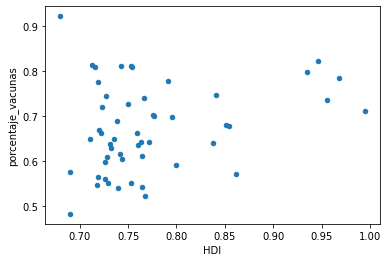

In [18]:
merged2.plot.scatter(x='HDI', y='porcentaje_vacunas')

<AxesSubplot:xlabel='HDI', ylabel='Nombre_comuna'>

<Figure size 7840x5600 with 0 Axes>

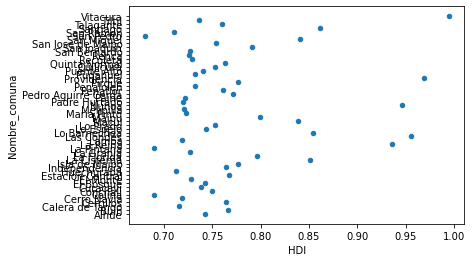

In [19]:
figure(figsize=(28, 20), dpi=280)
merged2.plot.scatter(x='HDI', y='Nombre_comuna')

Text(0.5, 1.0, 'vacunacion vs HDI  de la region metropolitanta')

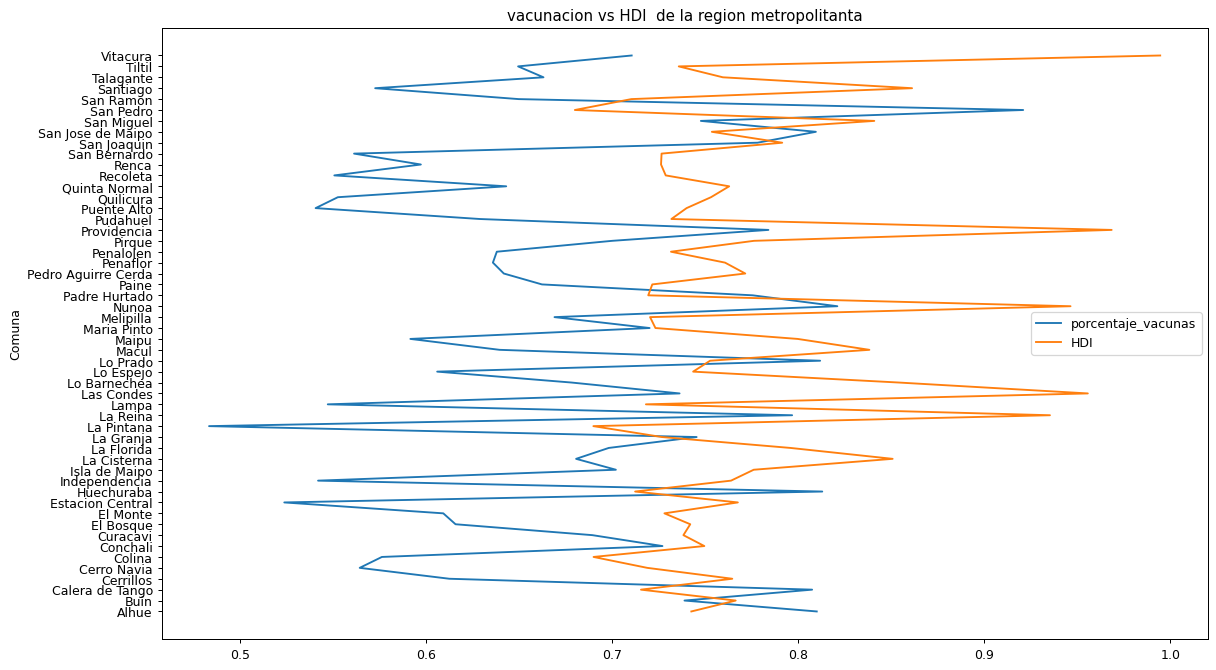

In [20]:
figure(figsize=(15, 9), dpi=90)
plt.plot(merged2['porcentaje_vacunas'],merged2['Nombre_comuna'], label = 'porcentaje_vacunas')
plt.plot(merged2['HDI'],merged2['Nombre_comuna'], label= 'HDI')
plt.legend(loc="right") 
plt.xlabel('')
plt.ylabel('Comuna')
plt.title('vacunacion vs HDI  de la region metropolitanta')

In [21]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/NuevaDefDefunciones/DefuncionesDEIS.csv')

In [22]:
dataframe

,Publicacion,en verificación,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10
0,confirmados_2020-06-18,NaN,NaN,0.0,NaN,1.0,1,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,confirmados_2020-06-28,NaN,NaN,0.0,NaN,1.0,1,1,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,confirmados_2020-07-03,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,confirmados_2020-07-09,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,confirmados_2020-07-17,NaN,NaN,NaN,NaN,1.0,1,1,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,sospechosos_2021-06-11,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416,sospechosos_2021-06-18,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,sospechosos_2021-06-25,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,sospechosos_2021-07-02,NaN,1.0,NaN,1.0,NaN,1,2,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
newdf = dataframe.drop(range(0,161,1))






In [24]:
newdf = newdf.drop(range(201,258,1))


In [25]:
newdf = dataframe[(dataframe['Publicacion']=='confirmados_2021-07-12')]
newdf = newdf.melt()
newdf = newdf.drop([0,1])
newdf= newdf.reset_index()
newdf = newdf.drop(['index'],axis=1)


In [26]:
newdf = newdf.query("variable >= '2020-12-24' and variable <= '2021-07-12'")


In [27]:
newdf = newdf.rename(columns ={'variable':'FECHA_DEF','value':'Cantidad muertos'})
newdf['FECHA_DEF']=pd.to_datetime(newdf['FECHA_DEF'])
newdf = newdf.resample('W', on ='FECHA_DEF').sum()
newdf = newdf.reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

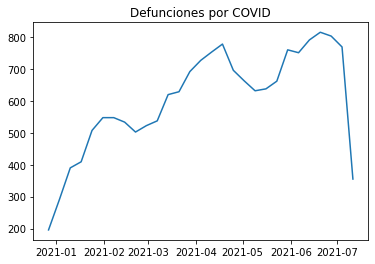

In [28]:

XX=newdf['FECHA_DEF']
YY=newdf['Cantidad muertos']

fig, ax = plt.subplots()
ax.plot(XX,YY)
plt.title("Defunciones por COVID")
plt.show

In [29]:
newdf

,FECHA_DEF,Cantidad muertos
0,2020-12-27,196.0
1,2021-01-03,291.0
2,2021-01-10,390.0
3,2021-01-17,409.0
4,2021-01-24,507.0
5,2021-01-31,547.0
6,2021-02-07,547.0
7,2021-02-14,533.0
8,2021-02-21,502.0
9,2021-02-28,522.0


In [30]:
import csv

In [31]:
dftres= pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv")

In [32]:
dftres

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,...,2021-06-07,2021-06-11,2021-06-14,2021-06-18,2021-06-21,2021-06-25,2021-06-28,2021-07-02,2021-07-05,2021-07-09
0,Arica y Parinacota,15,Arica,15101.0,247552.0,10.0,11.0,12.0,12.0,22.0,...,533.0,540.0,545.0,554.0,557.0,558.0,563.0,570.0,580.0,583.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
374,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
375,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376,Magallanes y la Antartica,12,Desconocido Magallanes,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
dftres=dftres.loc[dftres['Region']=='Metropolitana']
dftres

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,...,2021-06-07,2021-06-11,2021-06-14,2021-06-18,2021-06-21,2021-06-25,2021-06-28,2021-07-02,2021-07-05,2021-07-09
94,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,1.0,1.0,1.0,...,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,13.0
95,Metropolitana,13,Buin,13402.0,109641.0,24.0,26.0,32.0,34.0,46.0,...,185.0,191.0,194.0,199.0,198.0,202.0,206.0,209.0,215.0,218.0
96,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,1.0,2.0,3.0,...,38.0,39.0,39.0,40.0,41.0,41.0,43.0,45.0,45.0,45.0
97,Metropolitana,13,Cerrillos,13102.0,88956.0,19.0,24.0,31.0,35.0,42.0,...,196.0,197.0,198.0,201.0,204.0,206.0,207.0,213.0,220.0,224.0
98,Metropolitana,13,Cerro Navia,13103.0,142465.0,77.0,95.0,108.0,122.0,173.0,...,502.0,510.0,514.0,524.0,523.0,531.0,543.0,553.0,555.0,563.0
99,Metropolitana,13,Colina,13301.0,180353.0,31.0,37.0,42.0,50.0,67.0,...,237.0,238.0,241.0,248.0,254.0,257.0,262.0,267.0,272.0,278.0
100,Metropolitana,13,Conchali,13104.0,139195.0,69.0,77.0,106.0,118.0,152.0,...,484.0,492.0,500.0,506.0,510.0,517.0,522.0,527.0,534.0,536.0
101,Metropolitana,13,Curacavi,13503.0,36430.0,4.0,4.0,6.0,6.0,10.0,...,54.0,54.0,54.0,55.0,56.0,56.0,58.0,58.0,60.0,62.0
102,Metropolitana,13,El Bosque,13105.0,172000.0,47.0,60.0,80.0,88.0,129.0,...,498.0,505.0,513.0,518.0,530.0,534.0,543.0,547.0,551.0,560.0
103,Metropolitana,13,El Monte,13602.0,40014.0,6.0,6.0,13.0,13.0,23.0,...,88.0,90.0,90.0,91.0,92.0,93.0,95.0,96.0,97.0,100.0


In [34]:
merged2.head()

,Region,Nombre_comuna,Codigo_comuna,Poblacion,HDI,TOTAL_VAC,porcentaje_vacunas
0,Metropolitana,Alhue,13502.0,7405.0,0.742609,5998.0,0.809993
1,Metropolitana,Buin,13402.0,109641.0,0.766439,81016.0,0.738921
2,Metropolitana,Calera de Tango,13403.0,28525.0,0.715509,23034.0,0.807502
3,Metropolitana,Cerrillos,13102.0,88956.0,0.764616,54489.0,0.612539
4,Metropolitana,Cerro Navia,13103.0,142465.0,0.718874,80402.0,0.564363


In [35]:
defunciones = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto50/DefuncionesDEIS_confirmadosPorComuna_std.csv')

In [36]:
defunciones

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
0,Arica y Parinacota,15,Arica,15101.0,247552.0,2020-03-16,0.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,2020-03-16,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,2020-03-16,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,2020-03-16,0.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,2020-03-16,NaN
...,...,...,...,...,...,...,...
173393,Magallanes y la Antartica,12,Rio Verde,12103.0,211.0,2021-07-07,0.0
173394,Magallanes y la Antartica,12,San Gregorio,12104.0,681.0,2021-07-07,0.0
173395,Magallanes y la Antartica,12,Timaukel,12303.0,282.0,2021-07-07,0.0
173396,Magallanes y la Antartica,12,Torres del Paine,12402.0,1021.0,2021-07-07,0.0


In [37]:
defunciones=defunciones.loc[defunciones['Region']=='Metropolitana']



In [38]:
defunciones

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,Fecha,Defunciones
88,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-16,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,2020-03-16,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-16,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-16,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-16,0.0
...,...,...,...,...,...,...,...
173172,Metropolitana,13,Santiago,13101.0,503147.0,2021-07-07,0.0
173173,Metropolitana,13,Talagante,13601.0,81838.0,2021-07-07,0.0
173174,Metropolitana,13,Tiltil,13303.0,21477.0,2021-07-07,0.0
173175,Metropolitana,13,Vitacura,13132.0,96774.0,2021-07-07,0.0


In [39]:
defunciones=defunciones.rename(columns={'Comuna':'Nombre_comuna','Codigo comuna':'Codigo_comuna'})
defunciones.drop(['Region','Nombre_comuna','Poblacion'],axis=1, inplace=True)
final = pd.merge(defunciones, merged2, on='Codigo_comuna', how='left')
final

,Codigo region,Codigo_comuna,Fecha,Defunciones,Region,Nombre_comuna,Poblacion,HDI,TOTAL_VAC,porcentaje_vacunas
0,13,13502.0,2020-03-16,0.0,Metropolitana,Alhue,7405.0,0.742609,5998.0,0.809993
1,13,13402.0,2020-03-16,0.0,Metropolitana,Buin,109641.0,0.766439,81016.0,0.738921
2,13,13403.0,2020-03-16,0.0,Metropolitana,Calera de Tango,28525.0,0.715509,23034.0,0.807502
3,13,13102.0,2020-03-16,0.0,Metropolitana,Cerrillos,88956.0,0.764616,54489.0,0.612539
4,13,13103.0,2020-03-16,0.0,Metropolitana,Cerro Navia,142465.0,0.718874,80402.0,0.564363
...,...,...,...,...,...,...,...,...,...,...
25382,13,13101.0,2021-07-07,0.0,Metropolitana,Santiago,503147.0,0.861222,288140.0,0.572676
25383,13,13601.0,2021-07-07,0.0,Metropolitana,Talagante,81838.0,0.759548,54270.0,0.663139
25384,13,13303.0,2021-07-07,0.0,Metropolitana,Tiltil,21477.0,0.735826,13949.0,0.649485
25385,13,13132.0,2021-07-07,0.0,Metropolitana,Vitacura,96774.0,0.994584,68760.0,0.710521


In [40]:
final['def-100mil'] = (final['Defunciones']*100000)/final['Poblacion']

In [41]:
final = final.dropna()
final= final.reset_index()
final = final.drop(['index'],axis=1)



In [42]:

final = final.drop([0,1])
final= final.reset_index()
final = final.drop(['index'],axis=1)
final = final.query("Fecha >= '2020-12-24' and Fecha <= '2021-07-12'")


In [43]:
ddf = final[final.duplicated()].shape
print(ddf)

(0, 11)


In [44]:
final.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
final

,Codigo region,Codigo_comuna,Fecha,Defunciones,Region,Nombre_comuna,Poblacion,HDI,TOTAL_VAC,porcentaje_vacunas,def-100mil
14714,13,13502.0,2020-12-24,0.0,Metropolitana,Alhue,7405.0,0.742609,5998.0,0.809993,0.00000
14715,13,13402.0,2020-12-24,0.0,Metropolitana,Buin,109641.0,0.766439,81016.0,0.738921,0.00000
14716,13,13403.0,2020-12-24,0.0,Metropolitana,Calera de Tango,28525.0,0.715509,23034.0,0.807502,0.00000
14717,13,13102.0,2020-12-24,0.0,Metropolitana,Cerrillos,88956.0,0.764616,54489.0,0.612539,0.00000
14718,13,13103.0,2020-12-24,3.0,Metropolitana,Cerro Navia,142465.0,0.718874,80402.0,0.564363,2.10578
...,...,...,...,...,...,...,...,...,...,...,...
24901,13,13131.0,2021-07-07,0.0,Metropolitana,San Ramon,86510.0,0.710381,56215.0,0.649809,0.00000
24902,13,13101.0,2021-07-07,0.0,Metropolitana,Santiago,503147.0,0.861222,288140.0,0.572676,0.00000
24903,13,13601.0,2021-07-07,0.0,Metropolitana,Talagante,81838.0,0.759548,54270.0,0.663139,0.00000
24904,13,13303.0,2021-07-07,0.0,Metropolitana,Tiltil,21477.0,0.735826,13949.0,0.649485,0.00000


In [45]:
final = final.groupby(['Codigo_comuna','HDI','Poblacion','TOTAL_VAC']).sum().reset_index()
final

,Codigo_comuna,HDI,Poblacion,TOTAL_VAC,Codigo region,Defunciones,porcentaje_vacunas,def-100mil
0,13101.0,0.861222,503147.0,288140.0,2548,223.0,112.244414,44.321043
1,13102.0,0.764616,88956.0,54489.0,2548,68.0,120.057602,76.442286
2,13103.0,0.718874,142465.0,80402.0,2548,221.0,110.615183,155.125820
3,13104.0,0.749584,139195.0,101204.0,2548,165.0,142.505004,118.538741
4,13105.0,0.742015,172000.0,105929.0,2548,191.0,120.709791,111.046512
5,13106.0,0.767604,206792.0,108323.0,2548,119.0,102.669871,57.545746
6,13107.0,0.712375,112528.0,91481.0,2548,114.0,159.340573,101.308119
7,13108.0,0.763935,142065.0,76997.0,2548,114.0,106.228923,80.244958
8,13109.0,0.850780,100434.0,68362.0,2548,120.0,133.410518,119.481451
9,13110.0,0.795888,402433.0,280983.0,2548,407.0,136.849284,101.134847


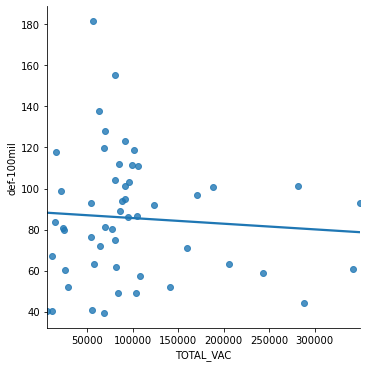

In [47]:
import seaborn as sb

sb.lmplot(x = "TOTAL_VAC",
            y = "def-100mil", 
            ci = None,
            data = final)

In [49]:
import statsmodels.formula.api as smff

modelo = smff.ols(formula='Defunciones ~ TOTAL_VAC + HDI',data= final)
entrega = modelo.fit()
print(entrega.summary())

                            OLS Regression Results                            
Dep. Variable:            Defunciones   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           6.67e-19
Time:                        16:12:34   Log-Likelihood:                -273.33
No. Observations:                  52   AIC:                             552.7
Df Residuals:                      49   BIC:                             558.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    277.1638     71.124      3.897      0.0

Como se puede ver en el resumen, el r-cuadrado indica que la cantidad de vacunados con el HDI tienen una correlacion del 81.9%.
Luego, el r-cuadrado ajustado nos indica que la variacion de las defunciones son explicadas en un 81.1% por el modelo.
Para finalizar las notas del resumen nos indican que existe una fuerte multicolinealidad en nuestro modelo.